In [63]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy
from scipy import optimize

from functools import reduce

from typing import Callable, List, Tuple
%matplotlib inline


One-dimensional direct methods

In [64]:
# Brute-force method
def exhaustive_search(fx: Callable[[float], float], a: float, b: float, epsilon: float = .001):

    iter = 0
    fcall = 0

    n = int((b-a) / epsilon)  # calculating n so that b-a/n <= eps
    step = (b-a) / n

    min_y = fx(a)
    min_x = a

    # We are just iterating over all x variables in range of 0..n
    for k in range(n):
        iter += 1
        x = a + k * step
        y = fx(x)       
        fcall += 1   
        # Trying to find the minimum
        if min_y > y: 
            min_y = y
            min_x = x

    return min_x, fcall, iter

In [65]:
def dichotomy(fx: Callable[[float], float], a: float, b: float, epsilon: float = .001):

    iter = 0
    fcall = 0

    delta = epsilon / 2     # so that  0 < delta < epsilon

    while (abs(a - b) >= epsilon):
        iter += 1

        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        
        # Moving bounds towards the minimum
        if(fx(x1) <= fx(x2)):
            b = x2
        else:
            a = x1
            
        fcall += 2 
        
    min_x = (a + b) / 2
    return min_x, fcall, iter

In [66]:
from math import sqrt


def golden_section(fx: Callable[[float], float], a: float, b: float, epsilon: float = .001):

    iter = 0
    fcall = 0

    x1 = a + (3 - np.sqrt(5))  * (b - a)/2
    x2 = b + (np.sqrt(5) - 3) * (b - a)/2    

    flag = 0    # flag is needed so we only calculate one function after the first iteration

    fx1 = 0
    fx2 = 0

    while (abs(a - b) >= epsilon):
        iter += 1
        
        if flag == 0:
            fx1 = fx(x1)
            fx2 = fx(x2)
            fcall += 2 

        elif flag == 1:
            x1 = a + (3 - np.sqrt(5))  * (b - a)/2
            fx2 = fx1
            fx1 = fx(x1)
            fcall += 1 

        elif flag == 2:
            x2 = b + (np.sqrt(5) - 3) * (b - a)/2
            fx1 = fx2
            fx2 = fx(x2)
            fcall += 1 


        if(fx1 <= fx2):
            b = x2
            x2 = x1
            flag = 1
        else:
            a = x1
            x1 = x2
            flag = 2
            
        
    min_x = (a + b) / 2
    return min_x, fcall, iter

Finding minimum

In [67]:
print('f(x) = x^3')

min_x, fcall, iter = exhaustive_search(lambda x: x**3, 0, 1)
print(f'Exhaustive search:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = dichotomy(lambda x: x**3, 0, 1)
print(f'Dichotomy method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = golden_section(lambda x: x**3, 0, 1)
print(f'Golden section method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

f(x) = x^3
Exhaustive search:	   Solution x: f(x) -> min = 0.00000 Number of f-calculations: 1000 Number of iterations: 1000
Dichotomy method:	   Solution x: f(x) -> min = 0.00049 Number of f-calculations: 22 Number of iterations: 11
Golden section method:	   Solution x: f(x) -> min = 0.00037 Number of f-calculations: 16 Number of iterations: 15


In [68]:
print('f(x) = |x - 0.2|')

min_x, fcall, iter = exhaustive_search(lambda x: abs(x-0.2), 0, 1)
print(f'Exhaustive search:\t ',' Solution x: f(x) -> min = {:.5} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = dichotomy(lambda x: abs(x-0.2), 0, 1)
print(f'Dichotomy method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = golden_section(lambda x: abs(x-0.2), 0, 1)
print(f'Golden section method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

f(x) = |x - 0.2|
Exhaustive search:	   Solution x: f(x) -> min = 0.2 Number of f-calculations: 1000 Number of iterations: 1000
Dichotomy method:	   Solution x: f(x) -> min = 0.20010 Number of f-calculations: 22 Number of iterations: 11
Golden section method:	   Solution x: f(x) -> min = 0.20007 Number of f-calculations: 16 Number of iterations: 15


In [69]:
print('f(x) = x * sin(1/x)')

min_x, fcall, iter = exhaustive_search(lambda x: x * np.sin(1/x), 0.1, 1)
print(f'Exhaustive search:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = dichotomy(lambda x: x * np.sin(1/x), 0.1, 1)
print(f'Dichotomy method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

min_x, fcall, iter = golden_section(lambda x: x * np.sin(1/x), 0.1, 1)
print(f'Golden section method:\t ',' Solution x: f(x) -> min = {:.5f} Number of f-calculations: {:.0f} Number of iterations: {:.0f}'.format(min_x, fcall, iter))

f(x) = x * sin(1/x)
Exhaustive search:	   Solution x: f(x) -> min = 0.22300 Number of f-calculations: 900 Number of iterations: 900
Dichotomy method:	   Solution x: f(x) -> min = 0.22257 Number of f-calculations: 22 Number of iterations: 11
Golden section method:	   Solution x: f(x) -> min = 0.22259 Number of f-calculations: 16 Number of iterations: 15


Task 2

In [70]:
# Generating random numbers
a = np.random.uniform()
b = np.random.uniform()

x = np.linspace(0, 1., 101, dtype=np.float64)

In [71]:
a, b, x

(0.6711824976083198,
 0.6083055757498997,
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]))

In [72]:
# Generating random data
def fx(x: NDArray[np.float64], alpha: float, beta: float) -> NDArray[np.float64]:
    theta = np.random.randn(101)
    y = alpha * x + beta
    noisy_y = y  + theta
    return y, noisy_y

In [73]:
y, noisy_y = fx(x, a, b)

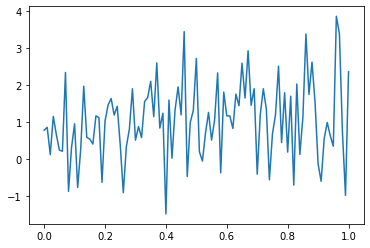

In [74]:
plt.plot(x, noisy_y)

Approximating the data 

In [75]:
# linear approximation function
def lin_approx_func(x, a, b):
    y = []

    for i in range(101):
        y.append(a * x[i] + b)

    return np.array(y)

# rational approximation function
def rat_approx_func(x, a, b):
    y = []

    for i in range(101):
        y.append(a / (1 + b * x[i]))
        
    return np.array(y)

In [76]:
def least_squares_linear(params, y_f, x):
    a, b = params
    return np.sum((lin_approx_func(x, a, b) - y_f) ** 2)

def least_squares_rational(params, y_f, x):
    a, b = params
    return np.sum((rat_approx_func(x, a, b) - y_f) ** 2)

In [77]:
print('Linear optimization')
# linear exhaustive search
a_ex, b_ex = scipy.optimize.brute(least_squares_linear, [[0, 1],[0, 1]], args=(noisy_y, x))
print(f'Exhaustive search method:\t', a_ex, b_ex)

# linear optimization Gauss method
gauss = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(noisy_y, x), method='Powell', tol=.001)
print(f'Gauss search method:\t', gauss.x[0], gauss.x[1])

# linear optimization Nelder-Mead
nelderMead = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(noisy_y, x), method='Nelder-Mead', tol=.001)
print(f'Nelder-Mead method:\t', nelderMead.x[0], nelderMead.x[1])

Linear optimization
Exhaustive search method:	 0.726031542300112 0.6875681483344553
Gauss search method:	 0.7260525795976657 0.6875458693068807
Nelder-Mead method:	 0.7263957421737569 0.6873289176964126


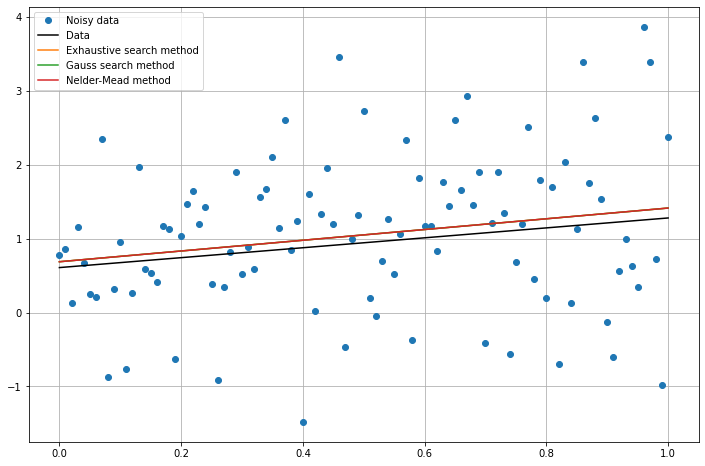

In [78]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, noisy_y, 'o')
plt.plot(x, y, color='black')

plot_y = []
for i in range(101):
    plot_y.append(a_ex * x[i] + b_ex)
plt.plot(x, plot_y)

plot_y = []
for i in range(101):
    plot_y.append(gauss.x[0] * x[i] + gauss.x[1])
plt.plot(x, plot_y)
    
plot_y = []
for i in range(101):
    plot_y.append(nelderMead.x[0] * x[i] + nelderMead.x[1])
plt.plot(x, plot_y)
    
plt.legend(['Noisy data', 'Data', 'Exhaustive search method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()

In [79]:
print('Rational optimization')
# rational exhaustive search
a_ex, b_ex = scipy.optimize.brute(least_squares_rational, [[0, 1],[0, 1]], args=(noisy_y, x))
print(f'Exhaustive search method:\t', a_ex, b_ex)

# rational optimization Gauss method
gauss = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(noisy_y, x), method='Powell', tol=.001)
print(f'Gauss search method:\t', gauss.x[0], gauss.x[1])

# rational optimization Nelder-Mead
nelderMead = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(noisy_y, x), method='Nelder-Mead', tol=.001)
print(f'Nelder-Mead method:\t', nelderMead.x[0], nelderMead.x[1])

Rational optimization
Exhaustive search method:	 0.8015844846289599 -0.4361070822304273
Gauss search method:	 0.8016673290008245 -0.4361890175412941
Nelder-Mead method:	 0.8018865508486617 -0.4358263336280155


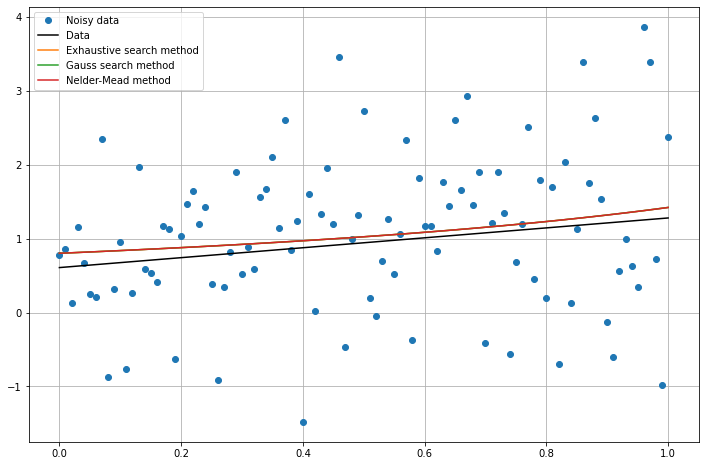

In [80]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, noisy_y, 'o')
plt.plot(x, y, color='black')

plot_y = []
for i in range(101):
    plot_y.append(a_ex / (1 + b_ex * x[i]))
plt.plot(x, plot_y)

plot_y = []
for i in range(101):
    plot_y.append(gauss.x[0] / (1 + gauss.x[1] * x[i]))
plt.plot(x, plot_y)
    
plot_y = []
for i in range(101):
    plot_y.append(nelderMead.x[0] / (1 + nelderMead.x[1] * x[i]))
plt.plot(x, plot_y)
    
plt.legend(['Noisy data', 'Data', 'Exhaustive search method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()